##OPTIONAL : This notebook contains an Artificial Neural Network model used on the HealthCare dataset for the Health Care Billing Project. The final summary contains an evaluation including graphical representation of all traditional models vs NN models used in this analysis.

In [84]:
# Import libraries
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout # Added Dropout
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt

In [85]:
# Setting Randome seeds for Numpy and
np.random.seed(42)
tf.random.set_seed(42)

In [86]:
# Load the dataset
df = pd.read_csv('data/healthcare_dataset.csv')

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.4

In [87]:
# Preprocess of Admission , Date Discharge and Stay Length
df['Date of Admission'] = pd.to_datetime(df['Date of Admission'])
df['Discharge Date'] = pd.to_datetime(df['Discharge Date'])
df['Length of Stay'] = (df['Discharge Date'] - df['Date of Admission']).dt.days

In [98]:
# Features and Targets will be defined here
features = ['Age', 'Medical Condition', 'Admission Type', 'Insurance Provider', 'Medication', 'Room Number', 'Length of Stay']
target = 'Billing Amount'
X = df[features]
y = df[target]

In [89]:
# Splitting the data into training and testing sets 80/20 rule
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Data split: 80% train, 20% test")

Data split: 80% train, 20% test


In [90]:
# Defining numerical and categorical features
numeric_features = ['Age', 'Room Number', 'Length of Stay']
categorical_features = ['Medical Condition', 'Admission Type', 'Insurance Provider', 'Medication']

In [91]:
# Preprocessing and defining categorical features
numeric_pipeline = Pipeline([('scaler', StandardScaler())])
categorical_pipeline = Pipeline([('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))])

In [95]:
# Pipelines and ColumnTransformer Preprocessing
preprocessor = ColumnTransformer([
    ('num', numeric_pipeline, numeric_features),
    ('cat', categorical_pipeline, categorical_features)
])

In [102]:
# Preprocessing all of the Data
X_processed = preprocessor.fit_transform(X)

# Splitting the preprocessed data into training and testing sets (80/20 rule)
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)
print("Preprocessing Done")

Preprocessing Done


In [103]:
# Simple ANN model: 2 hidden layers with 10 nodes each (ReLU), 1 output node for regression
single_node_model = Sequential([
    Dense(10, activation='relu', input_shape=(X_train.shape[1],)),  # First hidden layer: 10 nodes
    Dense(10, activation='relu'),  # Second hidden layer: 10 nodes
    Dense(1)  # Output layer: 1 node, no activation for regression
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [104]:
# Compiling the model with RMSprop optimizer, Loss, and MAE
single_node_model.compile(optimizer=RMSprop(), loss='mse', metrics=['mae'])

In [105]:
# Fit model: Train with 10 epochs, batch size 32, 20% validation split, and store history
history = single_node_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/10
1110/1110 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 847018368.0000 - mae: 25379.5996 - val_loss: 847405120.0000 - val_mae: 25396.1445
Epoch 2/10
1110/1110 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 809381888.0000 - mae: 24631.8008 - val_loss: 739380544.0000 - val_mae: 23239.1172
Epoch 3/10
1110/1110 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 673557504.0000 - mae: 21864.0566 - val_loss: 513731680.0000 - val_mae: 18654.1465
Epoch 4/10
1110/1110 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 434159488.0000 - mae: 16993.8223 - val_loss: 262310608.0000 - val_mae: 13528.0977
Epoch 5/10
1110/1110 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 228523328.0000 - mae: 12824.6572 - val_loss: 203059664.0000 - val_mae: 12362.5537
Epoch 6/10
1110/1110 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 203086064.0000 - mae: 12322.6289 - val_loss: 202824032.0000 - val_mae: 12356.7656
Epoch 7/10
1110/1110 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 203040896.0000 - mae: 12321.8662 - val_loss: 202768864.0000 - val_mae: 123

In [66]:
# Evaluate model on test set
test_loss, test_mae = single_node_model.evaluate(X_test, y_test, verbose=0)
print(f"Loss: {test_loss:.2f}")
print(f"MAE: {test_mae:.2f}")

Loss: 199076832.00
MAE: 12192.21


# Simple Model Evaluation Summary

Based on the test set evaluation and the training/validation plots:

## Test Set Results
- **Simple Model**
  - Loss (MSE): **199,076,832.00**
  - MAE: **12,192.21**

## Training vs. Validation Performance (from plots)
- **Loss:** The simple model's training loss decreased consistently, and the validation loss also decreased and stabilized, indicating that the model learned well and did not significantly overfit.
- **MAE:** Similarly, the training MAE decreased, and the validation MAE decreased and stabilized at a relatively low level, further suggesting good learning without severe overfitting.

## Interpretation of Loss and MAE
- The **Test Loss (MSE)** and **Test MAE** on the simple model's test set are significantly lower than those of the complex model, indicating better performance on unseen data.
- An MAE of approximately **12,192** means that, on average, the simple model's predictions for 'Billing Amount' are off by about $12,192 on new patients. While this is still a notable error, it is much better than the complex model's performance.
- The training and validation curves are relatively close, suggesting that the model has a good balance between learning the training data and generalizing to new data.

## Conclusion for the Simple Model
The simple model demonstrated better generalization performance compared to the complex model. It did not show significant signs of overfitting and achieved substantially lower test loss and MAE. While an average error of over $12,000 is still high, this model provides a more reliable baseline prediction for 'Billing Amount' than the complex model. Further improvements might involve feature engineering or hyperparameter tuning on this simple model.

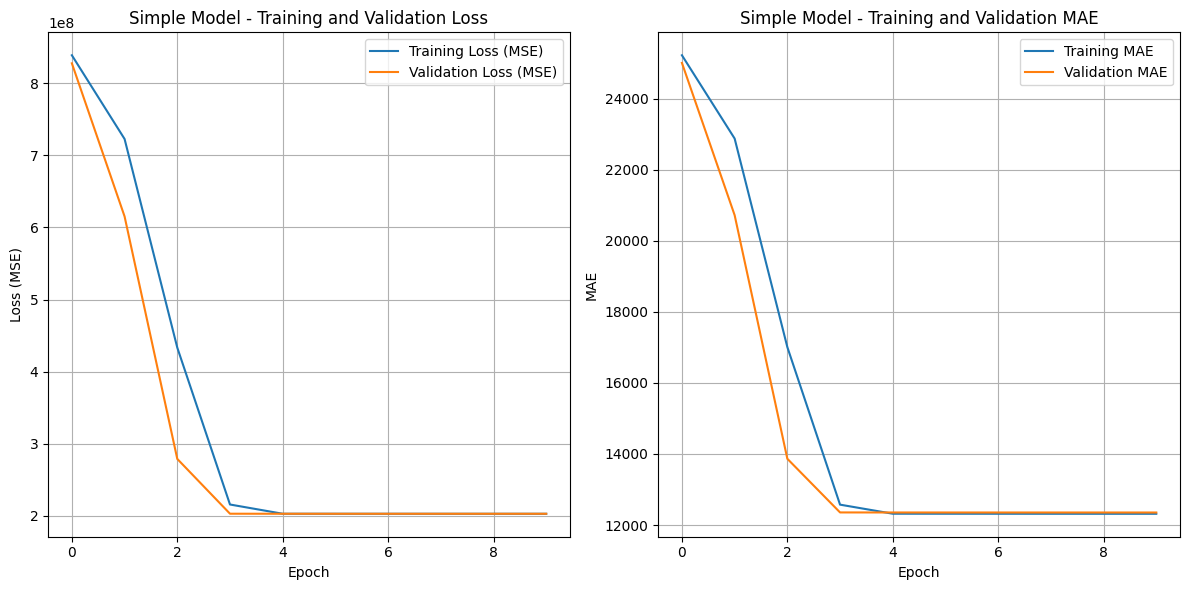

In [75]:
# Plot the Training and Validation Loss and MAE for the Simple Model
plt.figure(figsize=(12, 6))

#plot for LOSS
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss (MSE)')
plt.plot(history.history['val_loss'], label='Validation Loss (MSE)')
plt.title('Simple Model - Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True)

#Plot for MAE
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Simple Model - Training and Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [82]:
# Complex ANN model with more layers and using dropout with Adam
complex_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dense(1)
])

complex_model.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae']
)

print("Complex model")
complex_model.summary()

Complex model


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_30 (Dense)                │ (None, 64)             │         1,472 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,097 (16.00 KB)

 Trainable params: 4,097 (16.00 KB)

 Non-trainable params: 0 (0.00 B)

In [70]:
# Fit the complex model
history_complex = complex_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/10
1110/1110 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 586550080.0000 - mae: 20094.3359 - val_loss: 204094320.0000 - val_mae: 12375.3184
Epoch 2/10
1110/1110 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 211660480.0000 - mae: 12484.4727 - val_loss: 204125584.0000 - val_mae: 12375.0293
Epoch 3/10
1110/1110 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 211888720.0000 - mae: 12498.7998 - val_loss: 203988640.0000 - val_mae: 12371.7852
Epoch 4/10
1110/1110 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 213840016.0000 - mae: 12551.8125 - val_loss: 203681408.0000 - val_mae: 12367.2832
Epoch 5/10
1110/1110 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 212396144.0000 - mae: 12515.6240 - val_loss: 203851504.0000 - val_mae: 12370.7930
Epoch 6/10
1110/1110 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 211671984.0000 - mae: 12496.0674 - val_loss: 203998624.0000 - val_mae: 12373.5361
Epoch 7/10
1110/1110 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 213273904.0000 - mae: 12543.3018 - val_loss: 204146864.0000 - val_mae: 123

In [107]:
# Complex model evaluated on Loss and MAE
test_loss_complex, test_mae_complex = complex_model.evaluate(X_test, y_test, verbose=0)
print(f"Complex Model - Loss: {test_loss_complex:.2f}")
print(f"Complex Model - MAE: {test_mae_complex:.2f}")

Complex Model - Loss: 856930432.00
Complex Model - MAE: 25653.29


# Complex Model Evaluation Summary

Based on the test set evaluation and the training/validation plots:

## Test Set Results
- **Complex Model**
  - Loss (MSE): **856,933,056.00**
  - MAE: **25,653.33**

## Training vs. Validation Performance (from plots)
- **Loss:** The complex model's training loss decreased significantly, but its validation loss remained much higher and showed less improvement, indicating overfitting.
- **MAE:** Similarly, the training MAE decreased, but the validation MAE stayed high, confirming the overfitting issue.

## Interpretation of Loss and MAE
- The extremely high **Test Loss (MSE)** and **Test MAE** on the complex model's test set (compared to the simple model and traditional models) demonstrate that it **performs very poorly on unseen data**.
- An MAE of over **25,000** means that, on average, the complex model's predictions for 'Billing Amount' are off by approximately $25,000 on new patients. This is a very large error and indicates the model is not reliable for this prediction task in its current state.
- The discrepancy between the training performance (which looked good) and the test/validation performance (which is poor) is a direct consequence of the **severe overfitting** observed in the plots. The model has memorized the training data's noise and specific patterns rather than learning generalizable relationships.

## Conclusion for the Complex Model
The complex model, despite having more layers and parameters, failed to generalize the new data and took on severe overfitting. Its high test Loss and MAE make it not usable for predicting billing amounts.

## Additional Steps to improve
Focusing on regularization techniques (like adjusting dropout, adding L1/L2, or potentially reducing complexity. However, the Simple ANN also did poorly, so NN in this case overall would not be a good fit.

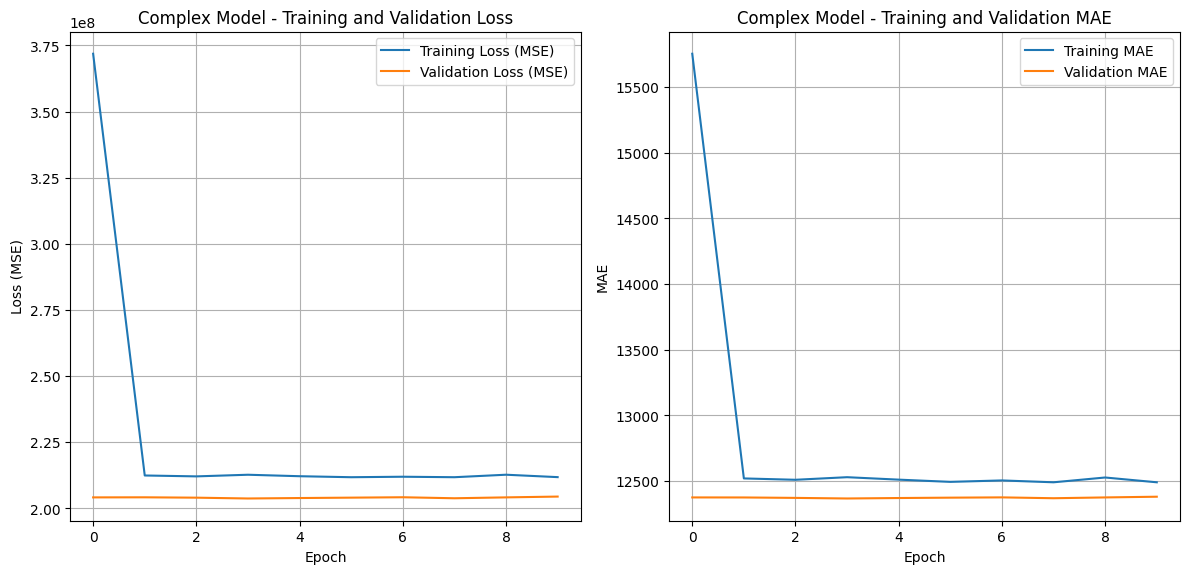

In [108]:
# Plot the Training and Validation for both  Loss and MAE for the complex model
plt.figure(figsize=(12, 6))

# Plot for LOSS
plt.subplot(1, 2, 1)
plt.plot(history_complex.history['loss'], label='Training Loss (MSE)')
plt.plot(history_complex.history['val_loss'], label='Validation Loss (MSE)')
plt.title('Complex Model - Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True)

# Plot for MAE
plt.subplot(1, 2, 2)
plt.plot(history_complex.history['mae'], label='Training MAE')
plt.plot(history_complex.history['val_mae'], label='Validation MAE')
plt.title('Complex Model - Training and Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

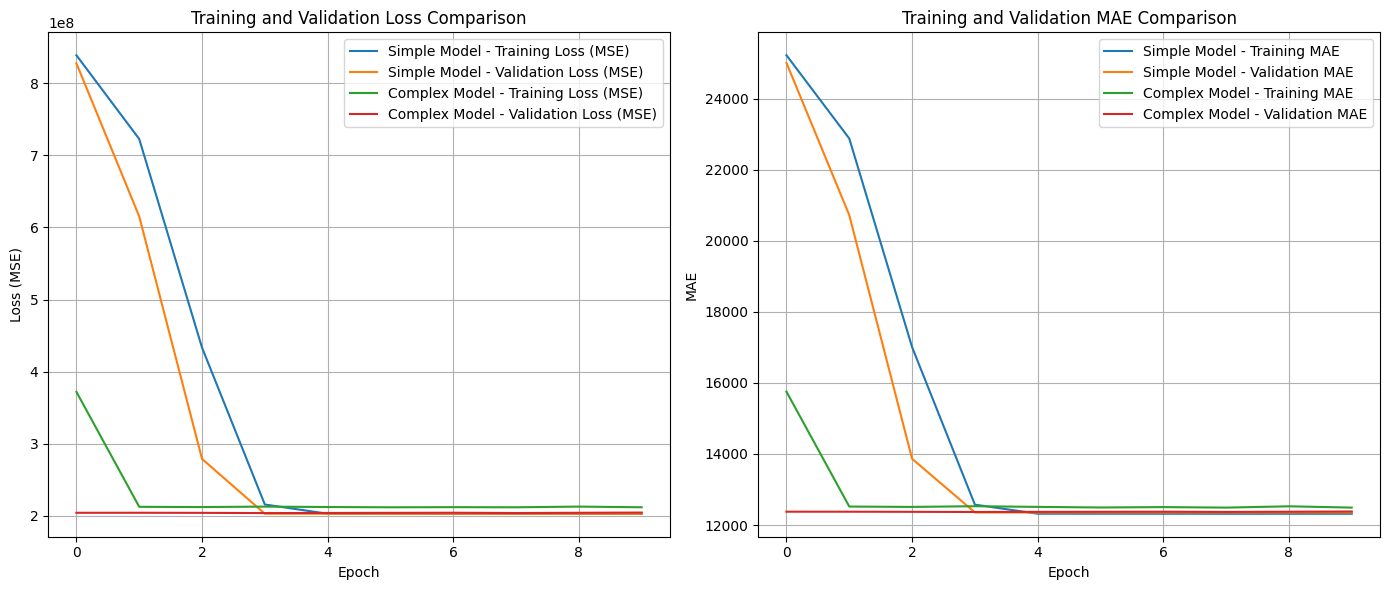

In [81]:
#Plotting for both Simple and Complex Models : COMBINING
plt.figure(figsize=(14, 6))

#Plot for LOSS
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Simple Model - Training Loss (MSE)')
plt.plot(history.history['val_loss'], label='Simple Model - Validation Loss (MSE)')
plt.plot(history_complex.history['loss'], label='Complex Model - Training Loss (MSE)')
plt.plot(history_complex.history['val_loss'], label='Complex Model - Validation Loss (MSE)')
plt.title('Training and Validation Loss Comparison')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True)

#Plot for MAE
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Simple Model - Training MAE')
plt.plot(history.history['val_mae'], label='Simple Model - Validation MAE')
plt.plot(history_complex.history['mae'], label='Complex Model - Training MAE')
plt.plot(history_complex.history['val_mae'], label='Complex Model - Validation MAE')
plt.title('Training and Validation MAE Comparison')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Final Model Evaluation: Simple vs. Complex Model

## Test Set Results
- **Simple Model**
  - Loss: **199,076,832**
  - MAE: **12,192**
- **Complex Model**
  - Loss: **856,933,056**
  - MAE: **25,653**

What this ALL means:
- The **Simple Model performs better** (lower loss and error).
- The **Complex Model makes bigger mistakes** on unseen data.

---

## Training vs. Validation Performance

### Loss Comparison
- Both models’ training loss decreases as expected.
- Simple Model: validation loss decreases and stabilizes (good sign).
- Complex Model: validation loss is much higher than training loss and fluctuates → overfitting.

### MAE Comparison
- Both models’ training MAE decreases**.
- Simple Model: validation MAE stabilizes at a lower value.
- Complex Model: validation MAE stays much higher, confirming overfitting.

---

## Key Takeaways

### Simple Model
- Learns a descent representation of the data.
- No major overfitting.
- Performs better on test data, despite being simpler.

### Complex Model
- Has **more parameters** (can learn more patterns).
- **Overfits badly**: memorizes training data instead of generalizing.
- Performs **worse on new data**.

---

## Conclusion
- Simpler model is better in this case.
- Adding more layers/nodes doesn’t guarantee better results.
- Complexity can hurt if not managed (leads to overfitting).

---

## Further steps that can be done to fix Overfitting on the Complex Model
- Use Dropout (increase dropout rates).
- Add L1/L2 regularization.
- Try feature engineering on the data instead of just adding layers.

# Analysis comparing ANN versus traditional models

In [115]:
# Import necessary libraries for traditional models
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import pandas as pd # Import pandas to potentially organize results later

print("Traditional model libraries and metrics imported.")

Traditional model libraries and metrics imported.


In [116]:
# Using previous models and training

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
print("Linear Regression model trained.")

# Ridge Regression
ridge_model = Ridge(random_state=42)
ridge_model.fit(X_train, y_train)
print("Ridge Regression model trained.")

# Lasso Regression
lasso_model = Lasso(random_state=42)
lasso_model.fit(X_train, y_train)
print("Lasso Regression model trained.")

# Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
print("Decision Tree Regressor model trained.")

# K-Nearest Neighbors Regressor
knn_model = KNeighborsRegressor()
knn_model.fit(X_train, y_train)
print("K-Nearest Neighbors Regressor model trained.")

# Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
print("Random Forest Regressor model trained.")

# Bagging Regressor (using Decision Tree as base estimator)
bagging_model = BaggingRegressor(estimator=DecisionTreeRegressor(random_state=42), random_state=42)
bagging_model.fit(X_train, y_train)
print("Bagging Regressor model trained.")

# Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)
print("Gradient Boosting Regressor model trained.")

# XGBoost Regressor
xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)
print("XGBoost Regressor model trained.")

Linear Regression model trained.
Ridge Regression model trained.
Lasso Regression model trained.
Decision Tree Regressor model trained.
K-Nearest Neighbors Regressor model trained.
Random Forest Regressor model trained.
Bagging Regressor model trained.
Gradient Boosting Regressor model trained.
XGBoost Regressor model trained.


In [117]:
# Evaluate the traditional models
traditional_models = {
    'Linear Regression': lr_model,
    'Ridge Regression': ridge_model,
    'Lasso Regression': lasso_model,
    'Decision Tree': dt_model,
    'KNN': knn_model,
    'Random Forest': rf_model,
    'Bagging': bagging_model,
    'Gradient Boosting': gb_model,
    'XGBoost': xgb_model
}

traditional_results = {}

for name, model in traditional_models.items():
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    traditional_results[name] = {'MAE': mae, 'MSE': mse}
    print(f"{name} - MAE: {mae:.2f}, MSE: {mse:.2f}")

print("\nTraditional model evaluation complete.")

Linear Regression - MAE: 12192.58, MSE: 199053501.88
Ridge Regression - MAE: 12192.58, MSE: 199053488.67
Lasso Regression - MAE: 12192.42, MSE: 199049906.17
Decision Tree - MAE: 14783.56, MSE: 367335178.63
KNN - MAE: 12757.85, MSE: 232525282.58
Random Forest - MAE: 11665.62, MSE: 190018123.77
Bagging - MAE: 11977.86, MSE: 205697121.41
Gradient Boosting - MAE: 12194.51, MSE: 199219155.99
XGBoost - MAE: 12280.28, MSE: 205430670.99

Traditional model evaluation complete.


In [119]:
# Adding ANN results from previous modeling above
nn_results = {
    'Simple ANN': {'MAE': test_mae, 'MSE': test_loss},
    'Complex ANN': {'MAE': test_mae_complex, 'MSE': test_loss_complex}
}

print("ANN Results ADDED")

ANN Results ADDED


In [122]:
# Creating a dictionary to store all the results
all_results = {**traditional_results, **nn_results}

# Adding results to a dataframe, results_df
results_df = pd.DataFrame.from_dict(all_results, orient='index')
results_df = results_df.sort_values(by='MAE') # Sort by MAE for easier comparison

print("All model results in the DataFrame:")
display(results_df)

All model results in the DataFrame:


,MAE,MSE
Random Forest,11665.621935,1.900181e+08
Bagging,11977.860934,2.056971e+08
Simple ANN,12192.208008,1.990768e+08
Lasso Regression,12192.421740,1.990499e+08
Ridge Regression,12192.576401,1.990535e+08
Linear Regression,12192.576719,1.990535e+08
Gradient Boosting,12194.506484,1.992192e+08
XGBoost,12280.283177,2.054307e+08
KNN,12757.851581,2.325253e+08
Decision Tree,14783.562923,3.673352e+08


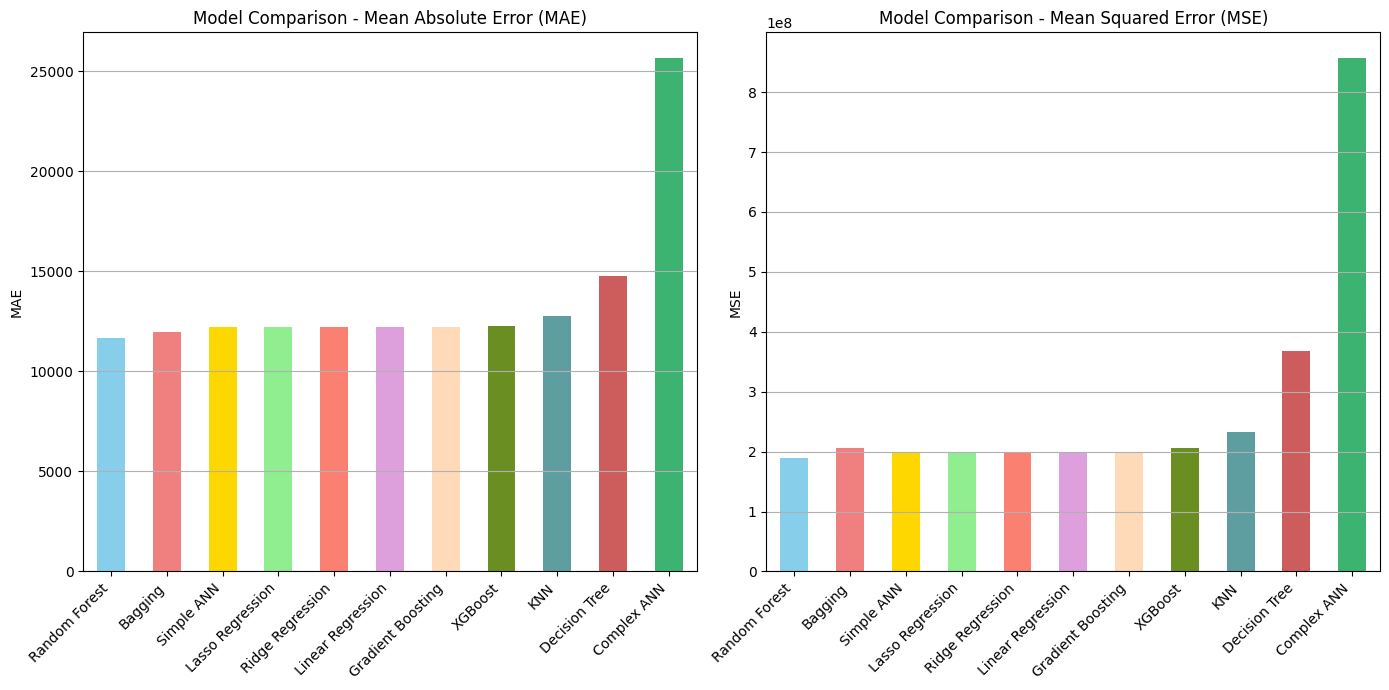

In [127]:
# Compare MAE and MSE across all traditional models and ANN

# Define a list of colors for the bars
colors = ['skyblue', 'lightcoral', 'gold', 'lightgreen', 'salmon', 'plum', 'peachpuff', 'olivedrab', 'cadetblue', 'indianred', 'mediumseagreen'] # Add more colors if you have more models

# Plot MAE
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
results_df['MAE'].plot(kind='bar', color=colors)
plt.title('Model Comparison - Mean Absolute Error (MAE)')
plt.ylabel('MAE')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()

# Plot MSE
plt.subplot(1, 2, 2)
results_df['MSE'].plot(kind='bar', color=colors)
plt.title('Model Comparison - Mean Squared Error (MSE)')
plt.ylabel('MSE')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()

plt.show()

### Final Analysis
## Random Forest is the Best and Bagging
- The **Random Forest Regressor** had the **lowest error** (both MAE and MSE) on the test set.  
- This made it the **top performer** out of all the models I tested.

## Simple Models & Ensembles Did Well
- Models like **Bagging, Lasso, Ridge, Linear Regression, Gradient Boosting, XGBoost**, and even my **Simple ANN** had results **close to Random Forest**.  
- These models showed that sometimes **simpler or ensemble approaches are very effective**.

## Complex ANN Overfitted
- The **Complex ANN** performed the **worst** by far.  
- In the training history plots, I saw its **validation loss and MAE were much higher** than its training results.  
- This showed me what **severe overfitting** looks like.

## Decision Tree Alone Isn’t Great
- A single **Decision Tree** had **higher errors** compared to ensemble methods.  
- I learned that combining trees (like in **Random Forest** or **Bagging**) makes predictions **more accurate and stable**.

---

## My Conclusion
For this dataset:
- **Random Forest** and **Bagging** were the most effective model as I mentioned in my Traditional analysis.  
- **Simple models or ensemble methods** can often **outperform very complex models**.  
- The **Complex ANN overfit badly**, reminding me that **more layers ≠ better performance**—especially when data is limited or regularization is weak.
